# Parte 1

En esta sección, se trabaja con la simulación del algoritmo OM

Antes de ejecutar todas las celdas, se recomienda ver los resultados, ya que a algunos se les cambiaron los parametros para que la ejecución no demore tanto.

En cada ejecución del algoritmo, se logean las decisiones que toman los nodos. En ejecuciones chicas de OM(1), se puede ver como funciona.


## Recomendación para los logs
Al habilitar el logeo, hay un warning que salta innecesariamente cada vez que se utiliza la funcion id de NeighborLabel

Para evitar esto se recomienda cambiar la clase NeighborLabel de pydistsim, ya que cada vez que se usa en el algoritmo, logea un warning innecesario. 
La clase se encuentra en `env_directory/lib/python3.11/site-packages/pydistsim/algorithm/node_wrapper.py` y hay que cambiar las lines 68 a 83 por lo siguiente:

```python
class NeighborLabel(_NodeWrapper):
    """
    Class that represents a neighbor of a node. It is used to represent the knowledge that a node has about its
    neighbors.
    """

    def __repr__(self):
        return f"Neighbor(label={self.id})"

    @property
    def id(self):
        #logger.warning(
        #    "Neighbor's id do not correspond to the real id of the node. It can be used to distinguish "
        #    "neighbors from each other."
        #)
        return super().id
```

Si no se quiere hacer esto no hay problema, pero los logs quedan peor.

## Parmetros

Setear la cantidad de nodos (N), traidores(M) y la decision (1 es ataque y 0 es retirada) del coordinador que se va a simular

In [22]:
# for interactive plots
%matplotlib inline

from pydistsim.logging import set_log_level, enable_logger, disable_logger
from pydistsim import NetworkGenerator, Simulation
from pydistsim.benchmark import AlgorithmBenchmark

set_log_level("INFO")
enable_logger()

/home/santi/miniconda3/envs/distsim/lib/python3.11/site-packages/pydistsim/network/network.py:560: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


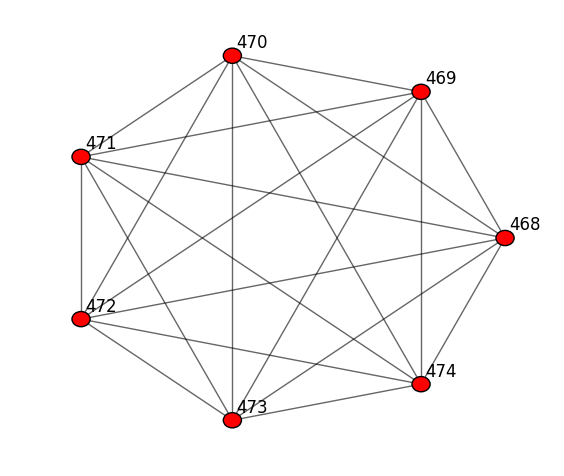

In [23]:
N = 7
M = 2

net = NetworkGenerator.generate_complete_network(n=N)
net.show()

In [24]:
from byzantine import ByzantineAlgorithm

sim = Simulation(network=net)
byzantine_algorithm = (ByzantineAlgorithm, {"n": N, "m": M, "decision": 1}, )
sim.algorithms = (byzantine_algorithm, )

2025-12-09 17:12:46.060 | INFO     | pydistsim.simulation:__init__:59 - Simulation 0x70cca21c20d0 created successfully.


## Ver simulación

In [25]:
from IPython.display import HTML
from pydistsim.gui import drawing as draw

anim = draw.create_animation(sim)
video = anim.to_html5_video()

HTML(video)

2025-12-09 17:12:46.553 | INFO     | byzantine:spontaneously:68 - Commander Node 470 sends decision ByzantineMessage.ATTACK.
2025-12-09 17:12:46.963 | INFO     | byzantine:received_more_than_one:128 - TRAITOR 468 receives decision ByzantineMessage.ATTACK with m=2. Starts recursion as commander for m=1, path [470, 468].
2025-12-09 17:12:46.964 | INFO     | byzantine:send_recursion_start:180 - Traitor Lieutenant 468 lies and sends ByzantineMessage.ATTACK to first half and ByzantineMessage.RETREAT to second half.
2025-12-09 17:12:46.964 | INFO     | byzantine:received_more_than_one:128 - TRAITOR 469 receives decision ByzantineMessage.ATTACK with m=2. Starts recursion as commander for m=1, path [470, 469].
2025-12-09 17:12:46.965 | INFO     | byzantine:send_recursion_start:180 - Traitor Lieutenant 469 lies and sends ByzantineMessage.ATTACK to first half and ByzantineMessage.RETREAT to second half.
2025-12-09 17:12:46.965 | INFO     | byzantine:received_more_than_one:128 - LIEUTIENANT 471 r

## Ejecutar simulación sin animación
Para así mostrar resultados de cada nodo.

In [26]:
sim.reset()
sim.run()

2025-12-09 17:12:53.384 | INFO     | byzantine:spontaneously:68 - Commander Node 471 sends decision ByzantineMessage.ATTACK.
2025-12-09 17:12:53.385 | INFO     | byzantine:received_more_than_one:128 - TRAITOR 468 receives decision ByzantineMessage.ATTACK with m=2. Starts recursion as commander for m=1, path [471, 468].
2025-12-09 17:12:53.386 | INFO     | byzantine:send_recursion_start:180 - Traitor Lieutenant 468 lies and sends ByzantineMessage.ATTACK to first half and ByzantineMessage.RETREAT to second half.
2025-12-09 17:12:53.387 | INFO     | byzantine:received_more_than_one:128 - TRAITOR 469 receives decision ByzantineMessage.ATTACK with m=2. Starts recursion as commander for m=1, path [471, 469].
2025-12-09 17:12:53.387 | INFO     | byzantine:send_recursion_start:180 - Traitor Lieutenant 469 lies and sends ByzantineMessage.ATTACK to first half and ByzantineMessage.RETREAT to second half.
2025-12-09 17:12:53.388 | INFO     | byzantine:received_more_than_one:128 - LIEUTIENANT 470 r

In [27]:
for node in net.nodes():
    print(f"Node {node._internal_id}: status={node.status}")
    for key, value in node.memory['saved_decisions'].items():
        print(f"  Key {key}: {value}")

Node 468: status=TRAITOR
  Key (471,): {'decisions': {468: 1, 469: 0, 470: 1, 472: 1, 474: 1, 473: 1}, 'total': 6}
  Key (471, 469): {'decisions': {468: 0, 470: 0, 472: 0, 473: 1, 474: 1}, 'total': 5}
  Key (471, 470): {'decisions': {468: 1, 469: 0, 472: 1, 473: 1, 474: 1}, 'total': 5}
  Key (471, 472): {'decisions': {468: 1, 469: 0, 470: 1, 473: 1, 474: 1}, 'total': 5}
  Key (471, 473): {'decisions': {468: 1, 469: 0, 470: 1, 472: 1, 474: 1}, 'total': 5}
  Key (471, 474): {'decisions': {468: 1, 469: 0, 470: 1, 472: 1, 473: 1}, 'total': 5}
Node 469: status=TRAITOR
  Key (471,): {'decisions': {469: 1, 468: 0, 470: 1, 472: 1, 474: 1, 473: 1}, 'total': 6}
  Key (471, 468): {'decisions': {469: 1, 470: 1, 472: 0, 473: 0, 474: 0}, 'total': 5}
  Key (471, 470): {'decisions': {469: 1, 468: 1, 472: 1, 473: 1, 474: 1}, 'total': 5}
  Key (471, 472): {'decisions': {469: 1, 468: 1, 470: 1, 473: 1, 474: 1}, 'total': 5}
  Key (471, 473): {'decisions': {469: 1, 468: 1, 470: 1, 472: 1, 474: 1}, 'total':

## Experimentos con benchmark
Ejecutar múltiples simulaciones para validar la complejidad del algoritmo. La corrida de OM(3), esta deshabilitada por su demora, para habilitarla, setear la flag `runOM3` en `True`

In [ ]:
runOM3 = False

disable_logger()
byzantine_algorithm = (ByzantineAlgorithm, {"n": 4, "m": 1, "decision": 1}, )
benchmark = AlgorithmBenchmark(
    (byzantine_algorithm,),
    network_sizes=[4],
    network_generators={"DETERMINISTIC":{ "complete": lambda n, directed: NetworkGenerator.generate_complete_network(n, directed_network=directed)}},
)

benchmark.run()


byzantine_algorithm_m_2 = (ByzantineAlgorithm, {"n":7, "m":2, "decision":1},)
benchmark2 = AlgorithmBenchmark(
    (byzantine_algorithm_m_2,),
    network_sizes=[7],
    network_generators={"DETERMINISTIC":{ "complete": lambda n, directed: NetworkGenerator.generate_complete_network(n, directed_network=directed)}},
)

benchmark2.run()

byzantine_algorithm_m_3 = (ByzantineAlgorithm, {"n":10, "m":3, "decision":1},)
benchmark3 = AlgorithmBenchmark(
    (byzantine_algorithm_m_3,),
    network_sizes=[10],
    network_generators={"DETERMINISTIC":{ "complete": lambda n, directed: NetworkGenerator.generate_complete_network(n, directed_network=directed)}},
)

if runOM3 == True:
    benchmark3.run()

In [36]:
df = benchmark.get_results_dataframe()

df

Net. node count  Net. edge count Network type  Qty. of messages sent  \
0                4                6     complete                      9   

   Qty. of messages delivered  Qty. of status changes  Qty. of steps  
0                          10                       7              8

In [37]:
df = benchmark2.get_results_dataframe()
df

Net. node count  Net. edge count Network type  Qty. of messages sent  \
0                7               21     complete                    156   

   Qty. of messages delivered  Qty. of status changes  Qty. of steps  
0                         157                      12             31

In [39]:
if runOM3 == True:
    df = benchmark3.get_results_dataframe()
    df

Net. node count  Net. edge count Network type  Qty. of messages sent  \
0               10               45     complete                   3609   

   Qty. of messages delivered  Qty. of status changes  Qty. of steps  
0                        3610                      17            406

## Validar experimentación

A continuación se muestra que el algoritmo terminó correctamente, cumpliendo las condiciones presentadas en el Paper

In [32]:
import pandas as pd

def experiment(max_n=10, max_f=3):
    resultados = []

    for decision in [1]:
        status = ByzantineAlgorithm.Status.ATTACK if decision == 1 else ByzantineAlgorithm.Status.RETREAT
        for f in range(max_f + 1):
            for n in range(2, max_n + 1):
                sim = Simulation(
                    network=NetworkGenerator.generate_complete_network(n=n),
                    algorithms=((ByzantineAlgorithm, {"n": n, "m": f, "decision": decision},),)
                )

                cond_teorica = (n >= 3*f + 1)

                try:
                    sim.run()
                    if sim_successful(sim, expected_decision=status):
                        resultado = "OK"
                    else:
                        resultado = "FAIL"
                except Exception as e:
                    resultado = "FAIL"

                resultados.append({
                    "n": n,
                    "f": f,
                    "teorico": cond_teorica,
                    "resultado": resultado,
                    "cumple": (resultado == "OK") == cond_teorica
                })

                print(f"n={n:2d}, f={f:2d} | teoría={cond_teorica} | sim={resultado}")
                # Convert to DataFrame
                df = pd.DataFrame(resultados)

                # Pivot the table: rows as (n, f), columns as teorico, resultado, cumple
                pivot_table = df.pivot(index=['n', 'f'], columns=[], values=['teorico', 'resultado', 'cumple'])

                # Display the table
                pivot_table

    return pivot_table

def sim_successful(sim, expected_decision = ByzantineAlgorithm.Status.ATTACK):
    decision = None
    for node in sim.network.nodes():
        if node.status == ByzantineAlgorithm.Status.COMMANDER or node.status == ByzantineAlgorithm.Status.LIEUTIENANT:
            return False
        if node.status == ByzantineAlgorithm.Status.ATTACK or node.status == ByzantineAlgorithm.Status.RETREAT:
            if decision == None:
                decision = node.status
            elif decision != node.status:
                return False
    if decision == None or decision != expected_decision:
        return False
    return all_recursions_successful(sim)

# En todos los nodos leales, para cada recursión, las decisiones de los nodos leales coinciden, llegando siempre al mismo resultado.
def all_recursions_successful(sim):
    nodes = list(sim.network.nodes())
    traitor_ids = [node.memory['unique_value'] for node in nodes if node.status == ByzantineAlgorithm.Status.TRAITOR]

    for i in range(len(nodes)):
        node1 = nodes[i]
        if node1.status == ByzantineAlgorithm.Status.TRAITOR or node1.status == ByzantineAlgorithm.Status.DONE:
            continue
        for j in range(i+1, len(nodes)):
            node2 = nodes[j]
            if node2.status == ByzantineAlgorithm.Status.TRAITOR or node2.status == ByzantineAlgorithm.Status.DONE:
                continue
            recursions = set(node1.memory['saved_decisions'].keys()) & set(node2.memory['saved_decisions'].keys())
            for recursion in recursions:
                decisions1 = node1.memory['saved_decisions'][recursion]['decisions']
                decisions2 = node2.memory['saved_decisions'][recursion]['decisions']
                common_subkeys = set(decisions1.keys()) & set(decisions2.keys())
                for subkey in common_subkeys:
                    if subkey not in traitor_ids:
                        if decisions1[subkey] != decisions2[subkey]:
                            print(f"Inconsistency: Node {node1.memory['unique_value']} and Node {node2.memory['unique_value']} have different decisions for recursion {recursion}, subkey {subkey}: {decisions1[subkey]} vs {decisions2[subkey]}")
                            return False
    return True

Probar múltiples combinaciones de n y f, comparando resultados teóricos vs. simulados. El resultado muestra la corrida de experiment(10,3). Esta seteado en (7,2) por costo computacional

In [33]:
experiment(7, 2)

2025-12-09 17:12:55.797 | INFO     | byzantine:spontaneously:68 - Commander Node 497 sends decision ByzantineMessage.ATTACK.
2025-12-09 17:12:55.801 | INFO     | byzantine:received_zero:191 - LIEUTIENANT 496 receives decision ByzantineMessage.ATTACK from lieutenant 497 with m=0 for path [497]. Saves decision.
2025-12-09 17:12:55.801 | INFO     | byzantine:process_final_decision:226 - LIEUTIENANT 496 makes final decision ByzantineMessage.ATTACK for path [497] based on received decisions: {497: 1}. This is the top-level lieutenant, so the algorithm ends here.
n= 2, f= 0 | teoría=True | sim=OK
2025-12-09 17:12:55.801 | INFO     | byzantine:received_zero:191 - LIEUTIENANT 496 receives decision ByzantineMessage.ATTACK from lieutenant 497 with m=0 for path [497]. Saves decision.
2025-12-09 17:12:55.801 | INFO     | byzantine:process_final_decision:226 - LIEUTIENANT 496 makes final decision ByzantineMessage.ATTACK for path [497] based on received decisions: {497: 1}. This is the top-level lie

teorico resultado cumple
n  f                         
2  0    True        OK   True
3  0    True        OK   True
4  0    True        OK   True
5  0    True        OK   True
6  0    True        OK   True
7  0    True        OK   True
8  0    True        OK   True
9  0    True        OK   True
10 0    True        OK   True
2  1   False      FAIL   True
3  1   False      FAIL   True
4  1    True        OK   True
5  1    True        OK   True
6  1    True        OK   True
7  1    True        OK   True
8  1    True        OK   True
9  1    True        OK   True
10 1    True        OK   True
2  2   False      FAIL   True
3  2   False      FAIL   True
4  2   False      FAIL   True
5  2   False      FAIL   True
6  2   False      FAIL   True
7  2    True        OK   True
8  2    True        OK   True
9  2    True        OK   True
10 2    True        OK   True
2  3   False      FAIL   True
3  3   False      FAIL   True
4  3   False      FAIL   True
5  3   False      FAIL   True
6  3   False      FAIL   True
7  3   False      FAIL   True
8  3   False      FAIL   True
9  3   False      FAIL   True
10 3    True        OK   True